In [23]:
from urllib.request import urlretrieve
import pandas as pd

# Assign URL of the file
url = 'https://www.fdic.gov/system/files/2024-07/banklist.csv'

# Save the file locally
urlretrieve(url, 'banklist.csv')

# Read the file into a DataFrame, specifying encoding to handle encoding issues
df = pd.read_csv('banklist.csv', encoding='ISO-8859-1')

# Display the head of the DataFrame
print(df.head())


                              Bank Name           City  State   Cert   \
0  Republic First Bank dba Republic Bank   Philadelphia     PA  27332   
1                          Citizens Bank       Sac City     IA   8758   
2               Heartland Tri-State Bank        Elkhart     KS  25851   
3                    First Republic Bank  San Francisco     CA  59017   
4                         Signature Bank       New York     NY  57053   

              Acquiring Institution  Closing Date    Fund  
0  Fulton Bank, National Association     26-Apr-24  10546  
1          Iowa Trust & Savings Bank      3-Nov-23  10545  
2             Dream First Bank, N.A.     28-Jul-23  10544  
3          JPMorgan Chase Bank, N.A.      1-May-23  10543  
4                Flagstar Bank, N.A.     12-Mar-23  10540  


In [24]:
df.shape

(569, 7)

In [26]:
# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()

# Now try the conversion again
df['Closing Date'] = pd.to_datetime(df['Closing Date'])


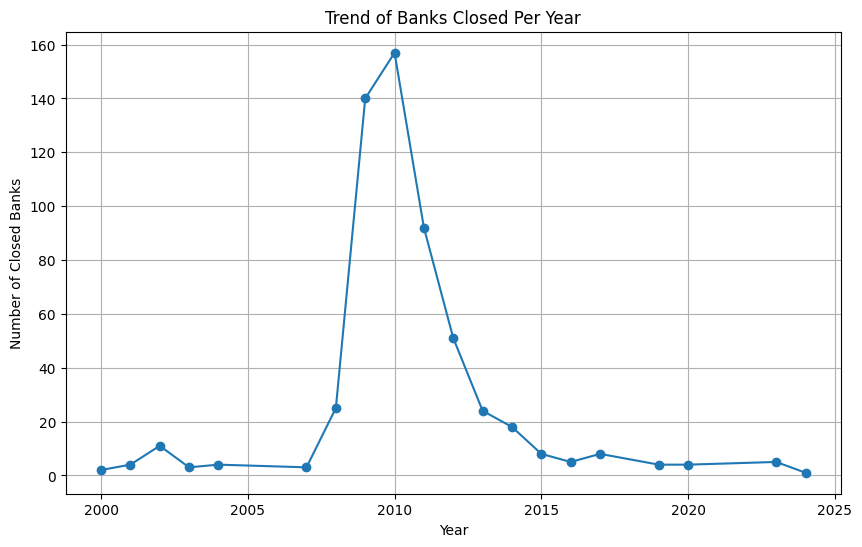

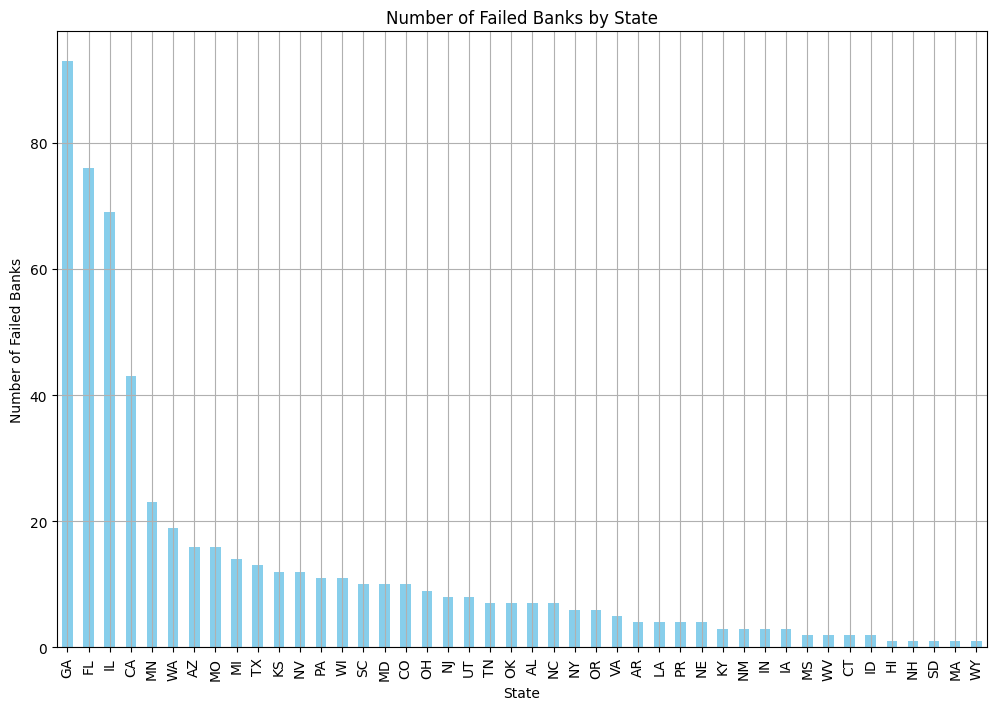

In [27]:
df.head(4)# Convert 'Closing Date' to datetime format
df['Closing Date'] = pd.to_datetime(df['Closing Date'])

# Extract the year from 'Closing Date'
df['Year'] = df['Closing Date'].dt.year

# Group by year to count the number of failed banks per year
banks_per_year = df.groupby('Year').size()

# Plot the trend of banks closed per year
plt.figure(figsize=(10, 6))
banks_per_year.plot(kind='line', marker='o')
plt.title('Trend of Banks Closed Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Closed Banks')
plt.grid(True)
plt.show()

# Group by state to count the number of failed banks by state
banks_by_state = df.groupby('State').size()

# Plot the number of failed banks by state
plt.figure(figsize=(12, 8))
banks_by_state.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Number of Failed Banks by State')
plt.xlabel('State')
plt.ylabel('Number of Failed Banks')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [28]:
# List of Republican-leaning and Democrat-leaning states (based on recent elections)
republican_states = [
    'AL', 'AK', 'AR', 'AZ', 'FL', 'GA', 'ID', 'IN', 'IA', 'KS', 'KY', 'LA', 'MS', 'MO', 
    'MT', 'NE', 'NC', 'ND', 'OH', 'OK', 'SC', 'SD', 'TN', 'TX', 'UT', 'WV', 'WY'
]

democrat_states = [
    'CA', 'CO', 'CT', 'DE', 'HI', 'IL', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NJ', 'NM', 
    'NY', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'WI'
]


In [29]:
# Add a new column categorizing each state as either Republican or Democrat
df['Political Affiliation'] = df['State'].apply(lambda x: 'Republican' if x in republican_states else 'Democrat' if x in democrat_states else 'Other')


In [30]:
# Count the number of failed banks by political affiliation
banks_by_affiliation = df['Political Affiliation'].value_counts()

# Display the counts
print(banks_by_affiliation)


Republican    310
Democrat      254
Other           5
Name: Political Affiliation, dtype: int64


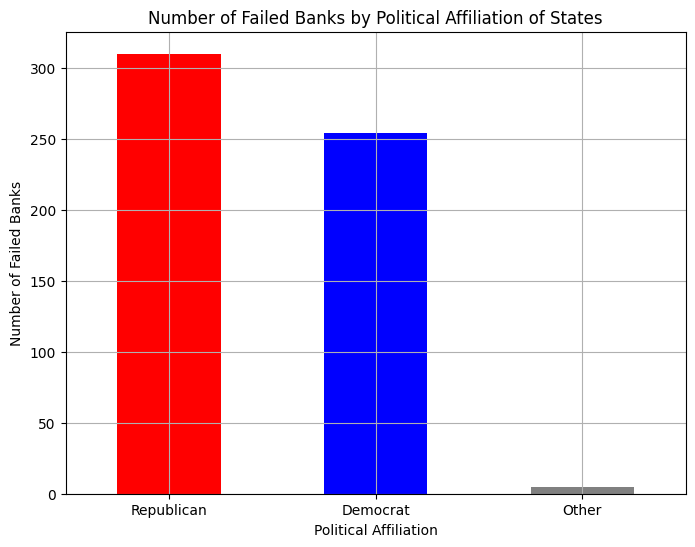

In [31]:
import matplotlib.pyplot as plt

# Create a bar plot to visualize the number of failed banks by political affiliation
plt.figure(figsize=(8, 6))
banks_by_affiliation.plot(kind='bar', color=['red', 'blue', 'gray'])
plt.title('Number of Failed Banks by Political Affiliation of States')
plt.xlabel('Political Affiliation')
plt.ylabel('Number of Failed Banks')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


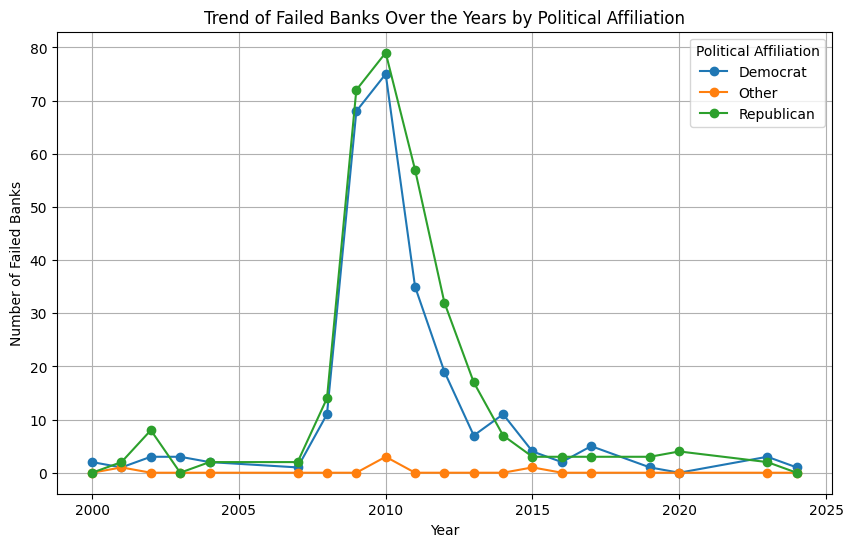

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# List of Republican-leaning and Democrat-leaning states (based on recent elections)
republican_states = [
    'AL', 'AK', 'AR', 'AZ', 'FL', 'GA', 'ID', 'IN', 'IA', 'KS', 'KY', 'LA', 'MS', 'MO', 
    'MT', 'NE', 'NC', 'ND', 'OH', 'OK', 'SC', 'SD', 'TN', 'TX', 'UT', 'WV', 'WY'
]

democrat_states = [
    'CA', 'CO', 'CT', 'DE', 'HI', 'IL', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NJ', 'NM', 
    'NY', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'WI'
]

# Assuming the DataFrame 'df' is already loaded
# Convert 'Closing Date' to datetime format
df['Closing Date'] = pd.to_datetime(df['Closing Date'], errors='coerce')

# Extract the year from 'Closing Date'
df['Year'] = df['Closing Date'].dt.year

# Add a new column categorizing each state as either Republican or Democrat
df['Political Affiliation'] = df['State'].apply(lambda x: 'Republican' if x in republican_states else 'Democrat' if x in democrat_states else 'Other')

# Group the data by 'Year' and 'Political Affiliation', and count the number of failed banks
failed_banks_trend = df.groupby(['Year', 'Political Affiliation']).size().unstack(fill_value=0)

# Plot the trend of failed banks over the years for each political affiliation
plt.figure(figsize=(10, 6))
failed_banks_trend.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Trend of Failed Banks Over the Years by Political Affiliation')
plt.xlabel('Year')
plt.ylabel('Number of Failed Banks')
plt.grid(True)
plt.legend(title='Political Affiliation')
plt.show()
